In [2]:
import pandas as pd
import os

# concate date in one file:


In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

merged_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    merged_data = pd.concat([merged_data, current_data])
    
    

## saving the data into csv file 

In [4]:
merged_data.to_csv("merged_data.csv", index=False)


In [5]:
merged_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# some data cleaning



#### deleting Nan types rows:

In [7]:
nan_df = merged_data[merged_data.isna().any(axis=1)]
display(nan_df.head())

merged_data = merged_data.dropna(how='all')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### checking if there any nan rows

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
merged_data = merged_data[merged_data['Order Date'].str[0:2]!='Or']


### adjust columns data type:

##### quantity orderd to int
##### price to float
##### order date to date

In [10]:
#display(merged_data[pd.to_numeric(merged_data['Price Each']).isnull()])
#merged_data = merged_data.dropna(how='all')

merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])

merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'],downcast='integer')


display(merged_data.info())
display(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int8   
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int8(1), object(4)
memory usage: 8.7+ MB


None

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# add some new columns:

#### add month column:

In [11]:
merged_data['month'] = merged_data['Order Date'].str[0:2]
merged_data['month'] = pd.to_numeric(merged_data['month'])
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### alternative way to extract month and time :  (it consumes some time)

In [12]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

In [28]:
#merged_data['month'] = pd.to_datetime(merged_data['Order Date']).dt.month

merged_data['hour'] = merged_data['Order Date'].dt.hour
merged_data['minute'] = merged_data['Order Date'].dt.minute
merged_data['day'] = merged_data['Order Date'].dt.dayofweek
merged_data['week_day'] = merged_data['Order Date'].dt.day_name()


merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,city,sales,week_day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,4,Dallas(TX),23.90,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,6,Boston(MA),99.99,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Los Angeles(CA),600.00,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Los Angeles(CA),11.99,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1,Los Angeles(CA),11.99,Tuesday


#### add city column :

In [43]:
def get_city(address):
    
    return address.split(",")[1]

def get_address(address):
    
    return address.split(",")[2].split(" ")[1]

merged_data['city'] = merged_data['Purchase Address'].apply(lambda x: get_city(x) +"("+ get_address(x)+")")
merged_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,city,sales,week_day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,4,Dallas(TX),23.90,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,6,Boston(MA),99.99,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Los Angeles(CA),600.00,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,4,Los Angeles(CA),11.99,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,1,Los Angeles(CA),11.99,Tuesday
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,13,3,0,San Francisco(CA),11.95,Monday
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,7,46,1,Seattle(WA),99.99,Tuesday
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,10,58,4,Atlanta(GA),11.95,Friday
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,10,38,2,San Francisco(CA),1700.00,Wednesday
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,14,5,0,Boston(MA),11.99,Monday


## What was the best month for sales?




In [15]:
merged_data['sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head(1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,day,city,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Friday,Dallas(TX),23.9


In [16]:
y=merged_data.groupby(['month']).sum()
y


,Quantity Ordered,Price Each,hour,minute,sales
month,,,,,
1,10903.0,1.811768e+06,139485,282440,1.822257e+06
2,13449.0,2.188885e+06,172669,354885,2.202022e+06
3,17005.0,2.791208e+06,218969,447559,2.807100e+06
4,20558.0,3.367671e+06,262259,544186,3.390670e+06
5,18667.0,3.135125e+06,238780,487899,3.152607e+06
6,15253.0,2.562026e+06,195528,402436,2.577802e+06
7,16072.0,2.632540e+06,206169,417349,2.647776e+06
8,13448.0,2.230345e+06,172289,353857,2.244468e+06
9,13109.0,2.084992e+06,168513,341698,2.097560e+06


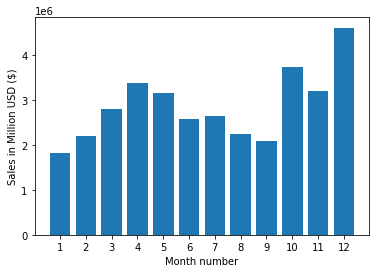

In [17]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,merged_data.groupby(['month']).sum()['sales'])
plt.xticks(months)

plt.ylabel('Sales in Million USD ($)')
plt.xlabel('Month number')
plt.show()

## which product sells the most?


In [18]:
product_quantity_sales = merged_data.groupby(['Product']).sum().sort_values(by='Quantity Ordered')
product_quantity_sales[product_quantity_sales.columns[0:2]]


,Quantity Ordered,Price Each
Product,,
LG Dryer,646.0,387600.00
LG Washing Machine,666.0,399600.00
Vareebadd Phone,2068.0,826000.00
20in Monitor,4129.0,451068.99
ThinkPad Laptop,4130.0,4127958.72
Macbook Pro Laptop,4728.0,8030800.00
Flatscreen TV,4819.0,1440000.00
Google Phone,5532.0,3315000.00
34in Ultrawide Monitor,6199.0,2348718.19


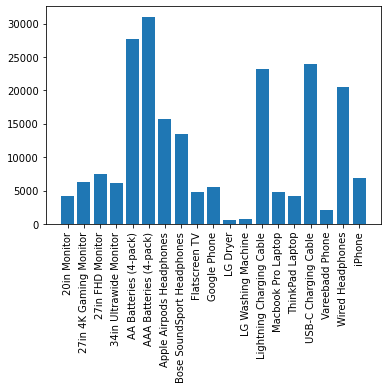

In [19]:
product_group = merged_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]

plt.bar(keys, quantity_ordered)

plt.xticks(keys, rotation='vertical', size=10)
plt.show()

### Is there any relation between product price and quantity orders?

<ipython-input-20-3e3e52c0943f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-20-3e3e52c0943f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


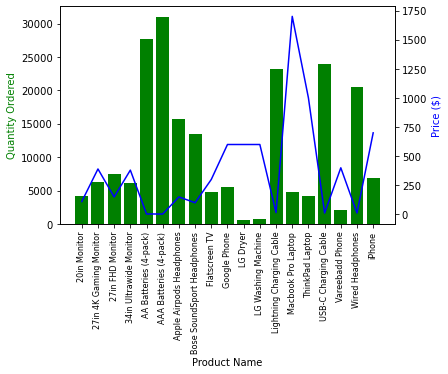

In [20]:

prices = merged_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### What city sold the most product?

In [21]:
merged_data.groupby(['city']).sum().sort_values(by='sales')

,Quantity Ordered,Price Each,month,hour,minute,sales
city,,,,,,
Portland(ME),2750.0,4.471893e+05,17144,35211,72856,4.497583e+05
Austin(TX),11153.0,1.809874e+06,69829,141946,289060,1.819582e+06
Portland(OR),11303.0,1.860558e+06,70621,144421,295533,1.870732e+06
Seattle(WA),16553.0,2.733296e+06,104941,213292,436368,2.747755e+06
Dallas(TX),16730.0,2.752628e+06,104620,214390,435155,2.767975e+06
Atlanta(GA),16602.0,2.779908e+06,104794,214264,442932,2.795499e+06
Boston(MA),22528.0,3.637410e+06,141112,288225,590442,3.661642e+06
New York City(NY),27932.0,4.635371e+06,175741,357696,733598,4.664317e+06
Los Angeles(CA),33289.0,5.421435e+06,208325,427444,866638,5.452571e+06


<function matplotlib.pyplot.show(close=None, block=None)>

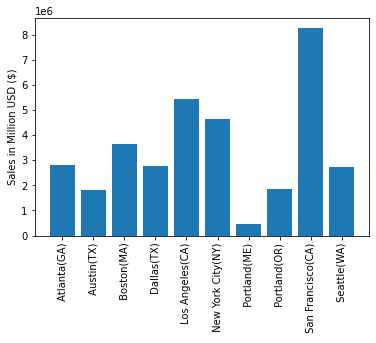

In [22]:
keys = [City for City, df in merged_data.groupby(['city'])]#dont use .unique() it leads to inconsistance 


plt.bar(keys,merged_data.groupby('city').sum()['sales'])
plt.ylabel('Sales in Million USD ($)')

plt.xticks(size=10, rotation='vertical')

plt.show


### Who are the best customers ?

In [23]:
merged_data.groupby(['Order ID']).sum().sort_values(by='sales')

,Quantity Ordered,Price Each,month,hour,minute,sales
Order ID,,,,,,
204578,1,2.99,5,21,39,2.99
179089,1,2.99,4,12,14,2.99
302495,1,2.99,12,13,40,2.99
192132,1,2.99,4,19,9,2.99
267399,1,2.99,10,21,40,2.99
...,...,...,...,...,...,...
255318,2,3400.00,18,22,116,3400.00
210292,2,1700.00,6,9,0,3400.00
243728,2,3400.00,16,24,114,3400.00


## what the best time to boost advertisement?

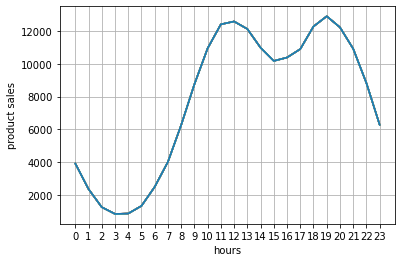

In [25]:
keys = [pair for pair, df in merged_data.groupby(['hour'])]


plt.plot(keys, merged_data.groupby(['hour']).count())
plt.ylabel('product sales')
plt.xlabel('hours')

plt.xticks(keys)

plt.grid()
plt.show()



## Is there any helpful relation between sales and week days?

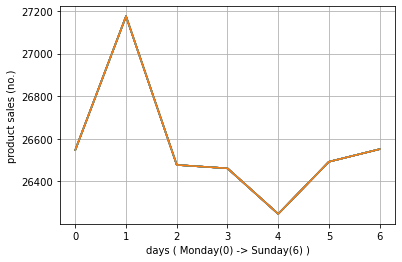

In [45]:
keys = [pair for pair, df in merged_data.groupby(['day'])]


plt.plot(keys, merged_data.groupby(['day']).count())
plt.ylabel('product sales (no.)')
plt.xlabel('days ( Monday(0) -> Sunday(6) )')


plt.xticks(keys)

plt.grid()
plt.show()

#In my openion the best time to boost advertisemnt is monday and start every day at 9:30 specially (Monday,Tuesday)